0.3976353643835253 0.9936905367902902
0.4728708045015882 1.0


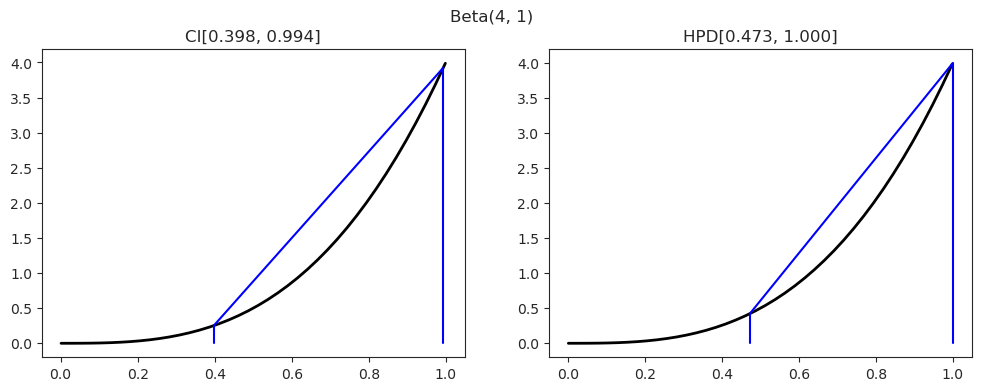

In [1]:
# -*- coding: utf-8 -*-
# based on  https://github.com/probml/pmtk3/blob/master/demos/betaHPD.m


import seaborn as sns
import numpy as np
from scipy.stats import beta
from scipy.optimize import fmin
import matplotlib.pyplot as plt

sns.set_style("ticks")


def HDIofICDF(dist_name, credMass=0.95, **args):
    """
    Warning: This only works for unimodal distributions
    Source : This was adapted from R to python from John K. Kruschke book, Doing bayesian data analysis,
    by aloctavodia as part of the answer to the following stackoverflow question[1].

    Reference:
    1. https://stackoverflow.com/questions/22284502/highest-posterior-density-region-and-central-credible-region
    """

    # freeze distribution with given arguments
    distri = dist_name(**args)
    # initial guess for HDIlowTailPr
    incredMass = 1.0 - credMass

    def intervalWidth(lowTailPr):
        return distri.ppf(credMass + lowTailPr) - distri.ppf(lowTailPr)

    # find lowTailPr that minimizes intervalWidth
    HDIlowTailPr = fmin(intervalWidth, incredMass, ftol=1e-8, disp=False)[0]
    # return interval as array([low, high])
    return list(distri.ppf([HDIlowTailPr, credMass + HDIlowTailPr]))


a, b = 4, 1
alpha = 0.05

l = beta.ppf(alpha / 2, a, b)
u = beta.ppf(1 - alpha / 2, a, b)
CI = [l, u]

HPD = HDIofICDF(beta, credMass=0.95, a=a, b=b)

xs = np.linspace(0.001, 0.999, 40)
ps = beta.pdf(xs, a, b)

names = ["CI", "HPD"]
linestyles = ["-", "-"]
ints = [CI, HPD]

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for i, inter in enumerate(ints):

    # The corresponding pdf for each point of the interval.
    l, u = inter
    y1 = beta.pdf(l, a, b)
    y2 = beta.pdf(u, a, b)

    # The range of the plot
    # ax[i].set_xlim(0, 1)
    # ax[i].set_ylim(0, 3.5)

    # The title of each plot
    ax[i].set_title(names[i] + f"[{l:.3f}, {u:.3f}]")

    # The plot of the pdf of the distribution
    ax[i].plot(xs, ps, "-", lw=2, label="beta pdf", color="black")

    # Plotting the intervals
    ax[i].plot((l, l), (0, y1), color="blue")
    ax[i].plot((l, u), (y1, y2), color="blue")
    ax[i].plot((u, u), (y2, 0), color="blue")
    print(l, u)

fig.suptitle("Beta(4, 1)")
plt.savefig("../graphs/betaHPD.png")
plt.show()
